In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import random


df = pd.read_csv('diabetes.csv')

# Split the dataset into predictor variables X and the target variable y
X = df.drop("Outcome", axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1)

# Create and train a logistic regression model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [3]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)

# Display predictions comparision
comparision = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
print(comparision.head(10))

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [5]:
# Print Accuracy Score
print(f"Test Accuracy : {accuracy_score(y_test, y_test_prediction) :.4f}")
print(f"Train Accuracy : {accuracy_score(y_train, y_train_prediction) :.4f}")

Test Accuracy : 0.7749
Train Accuracy : 0.7747


In [6]:
# Confusuion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix: ")
print(conf_mat)


Confusion Matrix: 
[[132  14]
 [ 38  47]]


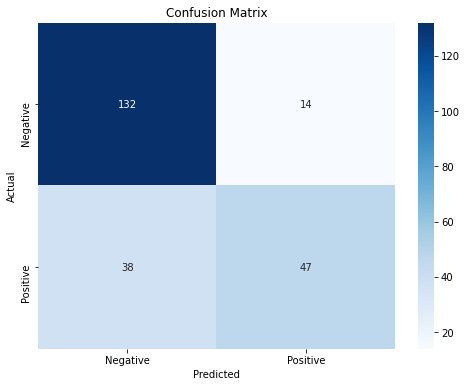

In [7]:
# Visualize confusion matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Classification Report
print("\n Classification Report : ")
print(classification_report(y_test, y_test_prediction))


 Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [9]:
# Calculate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP/(TP + FN)
precision = TP/(TP + FP)
specifity = TN/(TN+FP)
accuracy = (TP + TN)/(TP+FP+FN+TN)

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Specifity: {specifity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.5529
Precision: 0.7705
Specifity: 0.9041
Accuracy: 0.7749
